# **Sentiment Analysis About #BlokirKominfo Using Lexion Based**
### **Created by:** 
**Hilman Singgih Wicaksana, S.Kom**<br>
Masters Student of Information Systems at Diponegoro University, Semarang.

# **Crawling Data**

In [ ]:
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tweepy
import pandas as pd
import csv

In [ ]:
access_token = "[your_access_token]"
access_secret = "[your_access_secret_token]"
consumer_key = "[your_consumer_key_token]"
consumer_secret = "[your_consumer_secret_token]"

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=False, compression=True)

In [ ]:
def scraptweets(search_words, date_since, date_until):
  db_tweets = pd.DataFrame(columns=['username', 'tweetcreatedts', 'text'])
  tweets = tweepy.Cursor(
      api.search, q=search_words, lang="id",
      since=date_since, until=date_until, tweet_mode="extended").items(1000)
  tweet_list = [tweet for tweet in tweets]

  for tweet in tweet_list:
    username = tweet.user.screen_name
    tweetcreatedts = tweet.created_at

    try:
      text = tweet.retweeted.status.full_text
    except AttributeError:
      text = tweet.full_text

    ith_tweet = [username, tweetcreatedts, text]

    db_tweets.loc[len(db_tweets)] = ith_tweet

    print("Proses scrapping selesai dengan jumlah data", len(db_tweets))

  filename = "kominfo_sentiment.csv"
  db_tweets.to_csv(filename, index=False)

search_words = "#BlokirKominfo"
date_since = "2022-07-01"
date_until = "2022-07-31"

scraptweets(search_words, date_since, date_until)

Proses scrapping selesai dengan jumlah data 1
Proses scrapping selesai dengan jumlah data 2
Proses scrapping selesai dengan jumlah data 3
Proses scrapping selesai dengan jumlah data 4
Proses scrapping selesai dengan jumlah data 5
Proses scrapping selesai dengan jumlah data 6
Proses scrapping selesai dengan jumlah data 7
Proses scrapping selesai dengan jumlah data 8
Proses scrapping selesai dengan jumlah data 9
Proses scrapping selesai dengan jumlah data 10
Proses scrapping selesai dengan jumlah data 11
Proses scrapping selesai dengan jumlah data 12
Proses scrapping selesai dengan jumlah data 13
Proses scrapping selesai dengan jumlah data 14
Proses scrapping selesai dengan jumlah data 15
Proses scrapping selesai dengan jumlah data 16
Proses scrapping selesai dengan jumlah data 17
Proses scrapping selesai dengan jumlah data 18
Proses scrapping selesai dengan jumlah data 19
Proses scrapping selesai dengan jumlah data 20
Proses scrapping selesai dengan jumlah data 21
Proses scrapping seles

In [ ]:
#Load data
import pandas as pd
def load_data():
  data = pd.read_csv("kominfo_sentiment.csv")
  return data

tweet_df = load_data()

In [ ]:
#Buka tabel tweet
tweet_df = pd.DataFrame(tweet_df[['username', 'tweetcreatedts', 'text']])
tweet_df.head(10)

,username,tweetcreatedts,text
0,AdanJik,2022-07-30 23:59:59,RT @madisnur: Mungkin kita masih inget kelakua...
1,vanilla_lava,2022-07-30 23:59:59,"RT @alter_ozone: Diam bengong, sekali gerak bi..."
2,ByunnBaekhyun23,2022-07-30 23:59:54,RT @MstrYoda: Kpd yg tidak terhormat @kemkomin...
3,MisteriaTMR,2022-07-30 23:59:48,"RT @Avendi_Prasetyo: Steam, PayPal, Battlenet,..."
4,aisyaa_nf,2022-07-30 23:59:47,RT @MstrYoda: Kpd yg tidak terhormat @kemkomin...
5,IstiAsti,2022-07-30 23:59:47,"RT @Avendi_Prasetyo: Steam, PayPal, Battlenet,..."
6,badsweetiess,2022-07-30 23:59:43,RT @SportsTime_id: Semoga Kominfo Mendengar in...
7,ramadianr_,2022-07-30 23:59:42,RT @MstrYoda: Kpd yg tidak terhormat @kemkomin...
8,lapaknyaiza,2022-07-30 23:59:39,RT @cesntella: Rekomendasi celana panjang buat...
9,PitikSelokan,2022-07-30 23:59:35,"RT @DavidBenno: ""Diblokir Kominfo""\n#BlokirKom..."


# **Preprocessing**

## **Cleaning**

In [ ]:
import numpy as np
import re

In [ ]:
#remove mention username dan retweet
def remove_pattern(text, pattern_regex):
  r = re.findall(pattern_regex, text)
  for i in r:
    text = re.sub(i, '', text)
  return text

In [ ]:
tweet_df['clean_tweet'] = np.vectorize(remove_pattern)(tweet_df['text'], " *RT* | *@[\w:]*")
tweet_df.head()

,username,tweetcreatedts,text,clean_tweet
0,AdanJik,2022-07-30 23:59:59,RT @madisnur: Mungkin kita masih inget kelakua...,"Mungkin kita masih inget kelakuan pada 2019, ..."
1,vanilla_lava,2022-07-30 23:59:59,"RT @alter_ozone: Diam bengong, sekali gerak bi...","Diam bengong, sekali gerak bikin rusuh. #Blok..."
2,ByunnBaekhyun23,2022-07-30 23:59:54,RT @MstrYoda: Kpd yg tidak terhormat @kemkomin...,"Kpd yg tidak terhormat ,\nMengapa kalian begi..."
3,MisteriaTMR,2022-07-30 23:59:48,"RT @Avendi_Prasetyo: Steam, PayPal, Battlenet,...","Steam, PayPal, Battlenet, Epic Games dan lain..."
4,aisyaa_nf,2022-07-30 23:59:47,RT @MstrYoda: Kpd yg tidak terhormat @kemkomin...,"Kpd yg tidak terhormat ,\nMengapa kalian begi..."


In [ ]:
#remove simbol
def remove(text):
  text = ' ' .join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
  return text

tweet_df['remove_http'] = tweet_df['clean_tweet'].apply(lambda x: remove(x))
tweet_df.head()

,username,tweetcreatedts,text,clean_tweet,remove_http
0,AdanJik,2022-07-30 23:59:59,RT @madisnur: Mungkin kita masih inget kelakua...,"Mungkin kita masih inget kelakuan pada 2019, ...",Mungkin kita masih inget kelakuan pada 2019 di...
1,vanilla_lava,2022-07-30 23:59:59,"RT @alter_ozone: Diam bengong, sekali gerak bi...","Diam bengong, sekali gerak bikin rusuh. #Blok...",Diam bengong sekali gerak bikin rusuh BlokirKo...
2,ByunnBaekhyun23,2022-07-30 23:59:54,RT @MstrYoda: Kpd yg tidak terhormat @kemkomin...,"Kpd yg tidak terhormat ,\nMengapa kalian begi...",Kpd yg tidak terhormat Mengapa kalian begitu t...
3,MisteriaTMR,2022-07-30 23:59:48,"RT @Avendi_Prasetyo: Steam, PayPal, Battlenet,...","Steam, PayPal, Battlenet, Epic Games dan lain...",Steam PayPal Battlenet Epic Games dan lainya d...
4,aisyaa_nf,2022-07-30 23:59:47,RT @MstrYoda: Kpd yg tidak terhormat @kemkomin...,"Kpd yg tidak terhormat ,\nMengapa kalian begi...",Kpd yg tidak terhormat Mengapa kalian begitu t...


In [ ]:
#remove hashtag
def remov(tweet):
  tweet = re.sub(r'\$\w*', '', tweet)
  tweet = re.sub(r'^RT[\s]+', '', tweet)

  tweet = re.sub(r'#', '', tweet)
  tweet = re.sub('[0-9]+', '', tweet)

  return tweet

tweet_df['remove_hashtag'] = tweet_df['remove_http'].apply(lambda x: remov(x))
tweet_df.head()

,username,tweetcreatedts,text,clean_tweet,remove_http,remove_hashtag
0,AdanJik,2022-07-30 23:59:59,RT @madisnur: Mungkin kita masih inget kelakua...,"Mungkin kita masih inget kelakuan pada 2019, ...",Mungkin kita masih inget kelakuan pada 2019 di...,Mungkin kita masih inget kelakuan pada dia as...
1,vanilla_lava,2022-07-30 23:59:59,"RT @alter_ozone: Diam bengong, sekali gerak bi...","Diam bengong, sekali gerak bikin rusuh. #Blok...",Diam bengong sekali gerak bikin rusuh BlokirKo...,Diam bengong sekali gerak bikin rusuh BlokirKo...
2,ByunnBaekhyun23,2022-07-30 23:59:54,RT @MstrYoda: Kpd yg tidak terhormat @kemkomin...,"Kpd yg tidak terhormat ,\nMengapa kalian begi...",Kpd yg tidak terhormat Mengapa kalian begitu t...,Kpd yg tidak terhormat Mengapa kalian begitu t...
3,MisteriaTMR,2022-07-30 23:59:48,"RT @Avendi_Prasetyo: Steam, PayPal, Battlenet,...","Steam, PayPal, Battlenet, Epic Games dan lain...",Steam PayPal Battlenet Epic Games dan lainya d...,Steam PayPal Battlenet Epic Games dan lainya d...
4,aisyaa_nf,2022-07-30 23:59:47,RT @MstrYoda: Kpd yg tidak terhormat @kemkomin...,"Kpd yg tidak terhormat ,\nMengapa kalian begi...",Kpd yg tidak terhormat Mengapa kalian begitu t...,Kpd yg tidak terhormat Mengapa kalian begitu t...


In [ ]:
#Remove data duplikat
tweet_df.drop_duplicates(subset="remove_hashtag", keep="first", inplace=True)
tweet_df.head()

,username,tweetcreatedts,text,clean_tweet,remove_http,remove_hashtag
0,AdanJik,2022-07-30 23:59:59,RT @madisnur: Mungkin kita masih inget kelakua...,"Mungkin kita masih inget kelakuan pada 2019, ...",Mungkin kita masih inget kelakuan pada 2019 di...,Mungkin kita masih inget kelakuan pada dia as...
1,vanilla_lava,2022-07-30 23:59:59,"RT @alter_ozone: Diam bengong, sekali gerak bi...","Diam bengong, sekali gerak bikin rusuh. #Blok...",Diam bengong sekali gerak bikin rusuh BlokirKo...,Diam bengong sekali gerak bikin rusuh BlokirKo...
2,ByunnBaekhyun23,2022-07-30 23:59:54,RT @MstrYoda: Kpd yg tidak terhormat @kemkomin...,"Kpd yg tidak terhormat ,\nMengapa kalian begi...",Kpd yg tidak terhormat Mengapa kalian begitu t...,Kpd yg tidak terhormat Mengapa kalian begitu t...
3,MisteriaTMR,2022-07-30 23:59:48,"RT @Avendi_Prasetyo: Steam, PayPal, Battlenet,...","Steam, PayPal, Battlenet, Epic Games dan lain...",Steam PayPal Battlenet Epic Games dan lainya d...,Steam PayPal Battlenet Epic Games dan lainya d...
6,badsweetiess,2022-07-30 23:59:43,RT @SportsTime_id: Semoga Kominfo Mendengar in...,Semoga Kominfo Mendengar ini ya😏\n\n#BlokirKo...,Semoga Kominfo Mendengar ini ya BlokirKominfo ...,Semoga Kominfo Mendengar ini ya BlokirKominfo ...


# **Case Folding**

Membuat huruf dari tweet menjadi ukuran kecil, agar komputer lebih mudah dalam membaca data tersebut

* Tokenizing = memisahkan teks tweet menjadi potongan per kata
* Filtering = menghilangkan kata-kata yang kurang bermakna (seperti: yang, untuk, dsb)
* Stemming = menjadikan kata dasar (misal: mencintaimu = cinta)


In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import stopword
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords_indonesia = stopwords.words('indonesian')

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_factory = StopWordRemoverFactory().get_stop_words()
more_stopwords = [
    'yg', 'kpd', 'utk', 'cuman', 'deh', 'Btw', 'tapi', 'gua', 'gue', 'lo', 'lu',
    'kalo', 'trs', 'jd', 'nih', 'ntar', 'nya', 'lg', 'gk', 'dpt', 'dr', 'kpn',
    'kok', 'kyk', 'donk', 'yah', 'u', 'ya', 'ga', 'gak', 'km', 'eh', 'sih',
    'bang', 'bro', 'sob', 'mas', 'mba', 'haha', 'wkwk', 'kmrn', 'iy', 'affa',
    'iyah', 'lho', 'sbnry', 'tuh', 'kzl', 'hahaha', 'weh', 'tuh'
] 

data = stop_factory + more_stopwords

dictionary = ArrayDictionary(data)
str = StopWordRemover(dictionary)

print(data)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [ ]:
#import sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
#tokenize
import string
from nltk.tokenize import TweetTokenizer

happy_emoticons = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':x', ':>', '=]', '8)',
    ':-D', ':D', ':^)', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D',
    '=D', '=-3', ':-))', ':-)', "-')", ':*', ':^*', '>:P', ':-P', ':P',
    'X-P', 'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)',
    '>:-)', '<3'
])

sad_emoticons = set([
    ':L', ':-/', '>:/', ':$', '>:[', ':@', ':-(', ':[', ':-||', '=L',
    ':<', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'(", ':\\', ':-c',
    ':c', ':(', '>:\\', ':('
])

all_emoticons = happy_emoticons.union(sad_emoticons)

def clean_tweets(tweet):
  #tokenize tweets
  tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                             reduce_len=True)
  tweet_tokens = tokenizer.tokenize(tweet)

  tweet_clean = []

  for word in tweet_tokens:
    if(word not in data and
       word not in all_emoticons and
       word not in string.punctuation):
      stem_word = stemmer.stem(word)
      tweet_clean.append(stem_word) 
  
  return tweet_clean

In [ ]:
tweet_df['Tweet'] = tweet_df['remove_hashtag'].apply(lambda x: clean_tweets(x))
tweet_df.head()

,username,tweetcreatedts,text,clean_tweet,remove_http,remove_hashtag,Tweet
0,AdanJik,2022-07-30 23:59:59,RT @madisnur: Mungkin kita masih inget kelakua...,"Mungkin kita masih inget kelakuan pada 2019, ...",Mungkin kita masih inget kelakuan pada 2019 di...,Mungkin kita masih inget kelakuan pada dia as...,"[mungkin, inget, laku, asal, aja, blokir, inte..."
1,vanilla_lava,2022-07-30 23:59:59,"RT @alter_ozone: Diam bengong, sekali gerak bi...","Diam bengong, sekali gerak bikin rusuh. #Blok...",Diam bengong sekali gerak bikin rusuh BlokirKo...,Diam bengong sekali gerak bikin rusuh BlokirKo...,"[diam, bengong, sekali, gerak, bikin, rusuh, b..."
2,ByunnBaekhyun23,2022-07-30 23:59:54,RT @MstrYoda: Kpd yg tidak terhormat @kemkomin...,"Kpd yg tidak terhormat ,\nMengapa kalian begi...",Kpd yg tidak terhormat Mengapa kalian begitu t...,Kpd yg tidak terhormat Mengapa kalian begitu t...,"[hormat, kalian, bijak, laku, kalian, sangat, ..."
3,MisteriaTMR,2022-07-30 23:59:48,"RT @Avendi_Prasetyo: Steam, PayPal, Battlenet,...","Steam, PayPal, Battlenet, Epic Games dan lain...",Steam PayPal Battlenet Epic Games dan lainya d...,Steam PayPal Battlenet Epic Games dan lainya d...,"[steam, paypal, battlenet, epic, games, lai, b..."
6,badsweetiess,2022-07-30 23:59:43,RT @SportsTime_id: Semoga Kominfo Mendengar in...,Semoga Kominfo Mendengar ini ya😏\n\n#BlokirKo...,Semoga Kominfo Mendengar ini ya BlokirKominfo ...,Semoga Kominfo Mendengar ini ya BlokirKominfo ...,"[moga, kominfo, dengar, blokirkominfo, github,..."


In [ ]:
#remove punct
def remove_punct(text):
  text = " ".join([char for char in text if char not in string.punctuation])
  return text 

In [ ]:
tweet_df['Tweet'] = tweet_df['Tweet'].apply(lambda x: remove_punct(x))
tweet_df.head()

,username,tweetcreatedts,text,clean_tweet,remove_http,remove_hashtag,Tweet
0,AdanJik,2022-07-30 23:59:59,RT @madisnur: Mungkin kita masih inget kelakua...,"Mungkin kita masih inget kelakuan pada 2019, ...",Mungkin kita masih inget kelakuan pada 2019 di...,Mungkin kita masih inget kelakuan pada dia as...,mungkin inget laku asal aja blokir internet pa...
1,vanilla_lava,2022-07-30 23:59:59,"RT @alter_ozone: Diam bengong, sekali gerak bi...","Diam bengong, sekali gerak bikin rusuh. #Blok...",Diam bengong sekali gerak bikin rusuh BlokirKo...,Diam bengong sekali gerak bikin rusuh BlokirKo...,diam bengong sekali gerak bikin rusuh blokirko...
2,ByunnBaekhyun23,2022-07-30 23:59:54,RT @MstrYoda: Kpd yg tidak terhormat @kemkomin...,"Kpd yg tidak terhormat ,\nMengapa kalian begi...",Kpd yg tidak terhormat Mengapa kalian begitu t...,Kpd yg tidak terhormat Mengapa kalian begitu t...,hormat kalian bijak laku kalian sangat rugi masya
3,MisteriaTMR,2022-07-30 23:59:48,"RT @Avendi_Prasetyo: Steam, PayPal, Battlenet,...","Steam, PayPal, Battlenet, Epic Games dan lain...",Steam PayPal Battlenet Epic Games dan lainya d...,Steam PayPal Battlenet Epic Games dan lainya d...,steam paypal battlenet epic games lai blokir i...
6,badsweetiess,2022-07-30 23:59:43,RT @SportsTime_id: Semoga Kominfo Mendengar in...,Semoga Kominfo Mendengar ini ya😏\n\n#BlokirKo...,Semoga Kominfo Mendengar ini ya BlokirKominfo ...,Semoga Kominfo Mendengar ini ya BlokirKominfo ...,moga kominfo dengar blokirkominfo github paytr...


In [ ]:
#remove tweet kosong
tweet_df = tweet_df[tweet_df['Tweet'] != '']
tweet_df.head()

,username,tweetcreatedts,text,clean_tweet,remove_http,remove_hashtag,Tweet
0,AdanJik,2022-07-30 23:59:59,RT @madisnur: Mungkin kita masih inget kelakua...,"Mungkin kita masih inget kelakuan pada 2019, ...",Mungkin kita masih inget kelakuan pada 2019 di...,Mungkin kita masih inget kelakuan pada dia as...,mungkin inget laku asal aja blokir internet pa...
1,vanilla_lava,2022-07-30 23:59:59,"RT @alter_ozone: Diam bengong, sekali gerak bi...","Diam bengong, sekali gerak bikin rusuh. #Blok...",Diam bengong sekali gerak bikin rusuh BlokirKo...,Diam bengong sekali gerak bikin rusuh BlokirKo...,diam bengong sekali gerak bikin rusuh blokirko...
2,ByunnBaekhyun23,2022-07-30 23:59:54,RT @MstrYoda: Kpd yg tidak terhormat @kemkomin...,"Kpd yg tidak terhormat ,\nMengapa kalian begi...",Kpd yg tidak terhormat Mengapa kalian begitu t...,Kpd yg tidak terhormat Mengapa kalian begitu t...,hormat kalian bijak laku kalian sangat rugi masya
3,MisteriaTMR,2022-07-30 23:59:48,"RT @Avendi_Prasetyo: Steam, PayPal, Battlenet,...","Steam, PayPal, Battlenet, Epic Games dan lain...",Steam PayPal Battlenet Epic Games dan lainya d...,Steam PayPal Battlenet Epic Games dan lainya d...,steam paypal battlenet epic games lai blokir i...
6,badsweetiess,2022-07-30 23:59:43,RT @SportsTime_id: Semoga Kominfo Mendengar in...,Semoga Kominfo Mendengar ini ya😏\n\n#BlokirKo...,Semoga Kominfo Mendengar ini ya BlokirKominfo ...,Semoga Kominfo Mendengar ini ya BlokirKominfo ...,moga kominfo dengar blokirkominfo github paytr...


In [ ]:
#reset_index
tweet_df = tweet_df.reset_index(drop=True)
tweet_df.head()

,username,tweetcreatedts,text,clean_tweet,remove_http,remove_hashtag,Tweet
0,AdanJik,2022-07-30 23:59:59,RT @madisnur: Mungkin kita masih inget kelakua...,"Mungkin kita masih inget kelakuan pada 2019, ...",Mungkin kita masih inget kelakuan pada 2019 di...,Mungkin kita masih inget kelakuan pada dia as...,mungkin inget laku asal aja blokir internet pa...
1,vanilla_lava,2022-07-30 23:59:59,"RT @alter_ozone: Diam bengong, sekali gerak bi...","Diam bengong, sekali gerak bikin rusuh. #Blok...",Diam bengong sekali gerak bikin rusuh BlokirKo...,Diam bengong sekali gerak bikin rusuh BlokirKo...,diam bengong sekali gerak bikin rusuh blokirko...
2,ByunnBaekhyun23,2022-07-30 23:59:54,RT @MstrYoda: Kpd yg tidak terhormat @kemkomin...,"Kpd yg tidak terhormat ,\nMengapa kalian begi...",Kpd yg tidak terhormat Mengapa kalian begitu t...,Kpd yg tidak terhormat Mengapa kalian begitu t...,hormat kalian bijak laku kalian sangat rugi masya
3,MisteriaTMR,2022-07-30 23:59:48,"RT @Avendi_Prasetyo: Steam, PayPal, Battlenet,...","Steam, PayPal, Battlenet, Epic Games dan lain...",Steam PayPal Battlenet Epic Games dan lainya d...,Steam PayPal Battlenet Epic Games dan lainya d...,steam paypal battlenet epic games lai blokir i...
4,badsweetiess,2022-07-30 23:59:43,RT @SportsTime_id: Semoga Kominfo Mendengar in...,Semoga Kominfo Mendengar ini ya😏\n\n#BlokirKo...,Semoga Kominfo Mendengar ini ya BlokirKominfo ...,Semoga Kominfo Mendengar ini ya BlokirKominfo ...,moga kominfo dengar blokirkominfo github paytr...


In [ ]:
tweet_df.drop_duplicates(subset="remove_hashtag", keep="first", inplace=True)
tweet_df.head(10)

,username,tweetcreatedts,text,clean_tweet,remove_http,remove_hashtag,Tweet
0,AdanJik,2022-07-30 23:59:59,RT @madisnur: Mungkin kita masih inget kelakua...,"Mungkin kita masih inget kelakuan pada 2019, ...",Mungkin kita masih inget kelakuan pada 2019 di...,Mungkin kita masih inget kelakuan pada dia as...,mungkin inget laku asal aja blokir internet pa...
1,vanilla_lava,2022-07-30 23:59:59,"RT @alter_ozone: Diam bengong, sekali gerak bi...","Diam bengong, sekali gerak bikin rusuh. #Blok...",Diam bengong sekali gerak bikin rusuh BlokirKo...,Diam bengong sekali gerak bikin rusuh BlokirKo...,diam bengong sekali gerak bikin rusuh blokirko...
2,ByunnBaekhyun23,2022-07-30 23:59:54,RT @MstrYoda: Kpd yg tidak terhormat @kemkomin...,"Kpd yg tidak terhormat ,\nMengapa kalian begi...",Kpd yg tidak terhormat Mengapa kalian begitu t...,Kpd yg tidak terhormat Mengapa kalian begitu t...,hormat kalian bijak laku kalian sangat rugi masya
3,MisteriaTMR,2022-07-30 23:59:48,"RT @Avendi_Prasetyo: Steam, PayPal, Battlenet,...","Steam, PayPal, Battlenet, Epic Games dan lain...",Steam PayPal Battlenet Epic Games dan lainya d...,Steam PayPal Battlenet Epic Games dan lainya d...,steam paypal battlenet epic games lai blokir i...
4,badsweetiess,2022-07-30 23:59:43,RT @SportsTime_id: Semoga Kominfo Mendengar in...,Semoga Kominfo Mendengar ini ya😏\n\n#BlokirKo...,Semoga Kominfo Mendengar ini ya BlokirKominfo ...,Semoga Kominfo Mendengar ini ya BlokirKominfo ...,moga kominfo dengar blokirkominfo github paytr...
5,lapaknyaiza,2022-07-30 23:59:39,RT @cesntella: Rekomendasi celana panjang buat...,"Rekomendasi celana panjang buat kuliah,kerja ...",Rekomendasi celana panjang buat kuliah kerja a...,Rekomendasi celana panjang buat kuliah kerja a...,rekomendasi celana panjang buat kuliah kerja h...
6,PitikSelokan,2022-07-30 23:59:35,"RT @DavidBenno: ""Diblokir Kominfo""\n#BlokirKom...","""Diblokir Kominfo""\n#BlokirKominfo #PayPal #S...",Diblokir Kominfo BlokirKominfo PayPal STREAM e...,Diblokir Kominfo BlokirKominfo PayPal STREAM e...,blokir kominfo blokirkominfo paypal stream epi...
7,RaraGantariN,2022-07-30 23:59:34,RT @ekowboy2: Ini akibat kardus digembok..\n\n...,Ini akibat kardus digembok..\n\nAkhirnya Joko...,Ini akibat kardus digembok Akhirnya Jokowi dis...,Ini akibat kardus digembok Akhirnya Jokowi dis...,akibat kardus gembok akhir jokowi serang dukun...
8,nakamarising,2022-07-30 23:59:33,@ecommurz Protes! Semua bisa kena!\nBoomer orb...,Protes! Semua bisa kena!\nBoomer orba sialan ...,Protes Semua bisa kena Boomer orba sialan eman...,Protes Semua bisa kena Boomer orba sialan eman...,protes semua kena boomer orba sial emang bloki...
9,Izz_zzu,2022-07-30 23:59:31,RT @secgron: Beli game di Steam udah dipajakin...,Beli game di Steam udah dipajakin sama negara...,Beli game di Steam udah dipajakin sama negara ...,Beli game di Steam udah dipajakin sama negara ...,beli game steam udah dipajakin sama negara sej...


In [ ]:
#remove kolom
tweet_df.drop(tweet_df.columns[[0, 1, 2, 3, 4, 5]], axis=1, inplace=True)
tweet_df.head()

,Tweet
0,mungkin inget laku asal aja blokir internet pa...
1,diam bengong sekali gerak bikin rusuh blokirko...
2,hormat kalian bijak laku kalian sangat rugi masya
3,steam paypal battlenet epic games lai blokir i...
4,moga kominfo dengar blokirkominfo github paytr...


In [ ]:
#simpan data bersih
tweet_df.to_csv('clean_kominfo_sentiment.csv', encoding='utf8', index=False)

In [ ]:
#install googletrans
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd 
import googletrans
from googletrans import Translator

In [ ]:
df = pd.read_csv("clean_kominfo_sentiment.csv")
df.head()

,Tweet
0,mungkin inget laku asal aja blokir internet pa...
1,diam bengong sekali gerak bikin rusuh blokirko...
2,hormat kalian bijak laku kalian sangat rugi masya
3,steam paypal battlenet epic games lai blokir i...
4,moga kominfo dengar blokirkominfo github paytr...


In [ ]:
translator = Translator()
translations = {}
for column in df.columns:
  unique_elements = df[column].unique()
  for element in unique_elements:
    translations[element] = translator.translate(element).text
translations

{'adil blokirkominfo blokirkominfo': 'fair',
 'ahelah gin ken mulai pandang is it bapak bapak jokes blokirkominfo': 'ahelah gin ken starting to see is it, father, jokes, blokkominfo',
 'aja presiden baru lantik menteri ganti semua blokirkominfo': "Let's just say the new president inaugurated the minister to replace all kominfo",
 'akibat kardus gembok akhir jokowi serang dukung sendiri buzzer receh sampe influencer papan atas ki': 'due to the padlock box, Jokowi finally attacked, supported the buzzer himself until the top influencers ki',
 'aktivitas boomer hatihatikamumulaiberpikir blokirkominfo': 'boomer activity be careful you start thinking block kominfo',
 'aku blokirkominfo': 'I block kominfo',
 'anak bangsa ogah blokirkominfo': "the nation's children are reluctant to block kominfo",
 'analogi gin tukang bubur jual si pos satpam nyuruh tinggal ktp maksa ngintip ngambil topping apa aja ngelarang p': 'the analogy of the gin, the porridge maker, who sells it at the security post, or

In [ ]:
#mengganti semua kata yang diterjemahkan dari kamus ke original dataframe
df.replace(translations, inplace=True)
df.head(10)

,Tweet
0,maybe you remember doing it as long as you blo...
1,"silence, once motionless, make a riot"
2,"respect, you are wise, you are doing a lot of ..."
3,steam paypal battlenet epic games lai block In...
4,I hope kominfo listens to kominfo github paytr...
5,recommendation of trousers for college work ha...
6,kominfo block kominfo block paypal stream epic...
7,"due to the padlock box, Jokowi finally attacke..."
8,protest all hit by boomer orba damn it's reall...
9,Buying Steam games has been taxed by the state...


In [ ]:
#simpan hasil translasi
df.to_csv('translation_kominfo_sentiment.csv', encoding='utf8', index=False)

In [ ]:
import pandas as pd
def load_data():
  data = pd.read_csv('translation_kominfo_sentiment.csv')
  return data

In [ ]:
tweet_df = load_data()
tweet_df.head()

,Tweet
0,maybe you remember doing it as long as you blo...
1,"silence, once motionless, make a riot"
2,"respect, you are wise, you are doing a lot of ..."
3,steam paypal battlenet epic games lai block In...
4,I hope kominfo listens to kominfo github paytr...


# **Classification using Lexicon Based method**

In [ ]:
!pip install VaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [ ]:
scores = [analyser.polarity_scores(x) for x in tweet_df['Tweet']]
scores

[{'compound': -0.6682, 'neg': 0.244, 'neu': 0.756, 'pos': 0.0},
 {'compound': -0.5574, 'neg': 0.419, 'neu': 0.581, 'pos': 0.0},
 {'compound': 0.5994, 'neg': 0.131, 'neu': 0.514, 'pos': 0.354},
 {'compound': -0.4404, 'neg': 0.195, 'neu': 0.805, 'pos': 0.0},
 {'compound': 0.4404, 'neg': 0.0, 'neu': 0.854, 'pos': 0.146},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': -0.7003, 'neg': 0.326, 'neu': 0.674, 'pos': 0.0},
 {'compound': 0.0258, 'neg': 0.142, 'neu': 0.664, 'pos': 0.194},
 {'compound': -0.7264, 'neg': 0.47, 'neu': 0.53, 'pos': 0.0},
 {'compound': 0.4019, 'neg': 0.0, 'neu': 0.85, 'pos': 0.15},
 {'compound': 0.6705, 'neg': 0.097, 'neu': 0.599, 'pos': 0.304},
 {'compound': 0.8129, 'neg': 0.0, 'neu': 0.775, 'pos': 0.225},
 {'compound': -0.0516, 'neg': 0.123, 'neu': 0.72, 'pos': 0.157},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.7783, 'neg': 0.0, 'neu': 0.585, 'pos': 0.415},
 {'compound': -0.8074, 'neg': 0.257, 'neu': 0.743, 'pos': 0.

In [ ]:
tweet_df['Compound_Score'] = [x['compound'] for x in scores]
tweet_df.head()

,Tweet,Compound_Score
0,maybe you remember doing it as long as you blo...,-0.6682
1,"silence, once motionless, make a riot",-0.5574
2,"respect, you are wise, you are doing a lot of ...",0.5994
3,steam paypal battlenet epic games lai block In...,-0.4404
4,I hope kominfo listens to kominfo github paytr...,0.4404


In [ ]:
#compound score lexicon based
tweet_df.loc[tweet_df['Compound_Score'] < 0, 'Sentiments'] = 'Negatif'
tweet_df.loc[tweet_df['Compound_Score'] == 0, 'Sentiments'] = 'Netral'
tweet_df.loc[tweet_df['Compound_Score'] > 0, 'Sentiments'] = 'Positif'
tweet_df.head()

,Tweet,Compound_Score,Sentiments
0,maybe you remember doing it as long as you blo...,-0.6682,Negatif
1,"silence, once motionless, make a riot",-0.5574,Negatif
2,"respect, you are wise, you are doing a lot of ...",0.5994,Positif
3,steam paypal battlenet epic games lai block In...,-0.4404,Negatif
4,I hope kominfo listens to kominfo github paytr...,0.4404,Positif


In [ ]:
#simpan hasil klasifikasi
tweet_df.to_csv('classification_kominfo_sentiment.csv', encoding='utf8', index=False)

# **Visualization**

In [ ]:
!pip install tweet-preprocessor
!pip install textblob
!pip install emoji
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def load_data():
  data = pd.read_csv('classification_kominfo_sentiment.csv')
  return data

In [ ]:
tweet_df = load_data()
tweet_df.head()

,Tweet,Compound_Score,Sentiments
0,maybe you remember doing it as long as you blo...,-0.6682,Negatif
1,"silence, once motionless, make a riot",-0.5574,Negatif
2,"respect, you are wise, you are doing a lot of ...",0.5994,Positif
3,steam paypal battlenet epic games lai block In...,-0.4404,Negatif
4,I hope kominfo listens to kominfo github paytr...,0.4404,Positif


In [ ]:
!pip install matplotlib==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


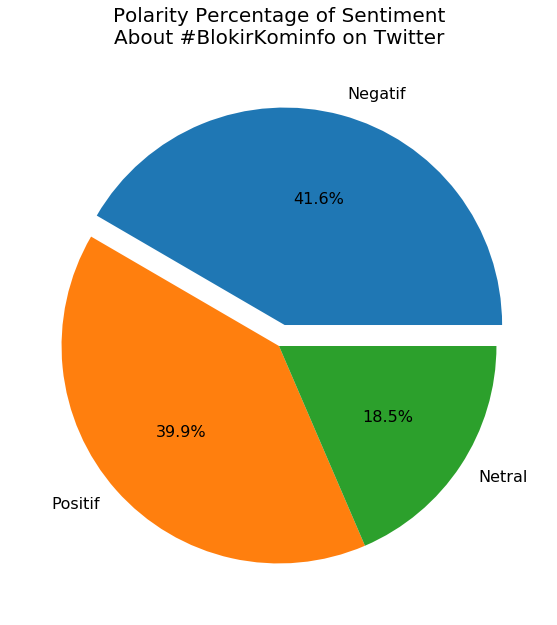

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize = (10, 10))
sizes = [count for count in tweet_df['Sentiments'].value_counts()]
labels = list(tweet_df['Sentiments'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 16})
ax.set_title('Polarity Percentage of Sentiment\nAbout #BlokirKominfo on Twitter', fontsize = 20, pad = 30)
fig.set_facecolor('white')
plt.show()
plt.savefig('pie_chart.png')

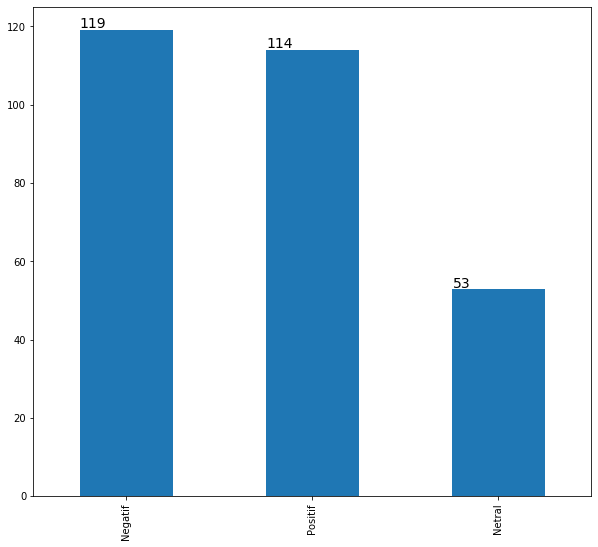

<Figure size 432x288 with 0 Axes>

In [ ]:
s = pd.value_counts(tweet_df['Sentiments'])
ax = s.plot.bar(figsize = (10, 9))
plt.rcParams['axes.facecolor'] = 'white'

for p in ax.patches:
  ax.annotate("{:,}".format(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize = 14)

plt.show()
plt.savefig('bar_chart.png')

In [ ]:
#sentiment negatif
negative_sentiment = (tweet_df['Sentiments'] == 'Negatif').sum()
print("The number of negative sentiments is:\t", negative_sentiment)

#sentiment positif
positive_sentiment = (tweet_df['Sentiments'] == 'Positif').sum()
print("The number of positive sentiments is:\t", positive_sentiment)

#sentiment netral
neutral_sentiment = (tweet_df['Sentiments'] == 'Netral').sum()
print("The number of neutral sentiments is:\t", neutral_sentiment)

# total
total = len(tweet_df.index)
print("The overall total of sentiments is:\t", total)

The number of negative sentiments is:	 119
The number of positive sentiments is:	 114
The number of neutral sentiments is:	 53
The overall total of sentiments is:	 286


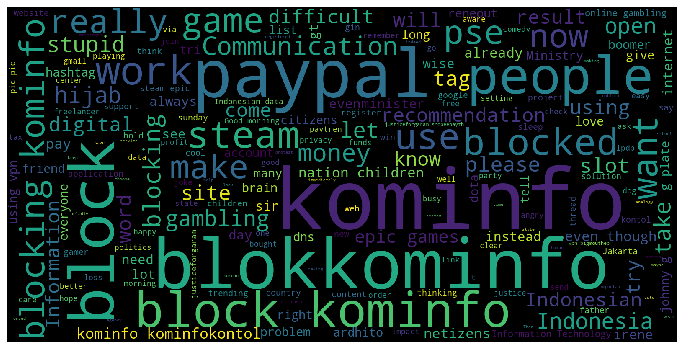

<Figure size 432x288 with 0 Axes>

In [ ]:
from wordcloud import WordCloud

#Creating the text variable
text = " ".join(tweet for tweet in tweet_df['Tweet'])

# Generate word cloud
word_cloud = WordCloud(width=1600, height=800, max_font_size=200,
                       background_color='black').generate(text)

# Display the generated Word Cloud
plt.figure(figsize=(12,10))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()
plt.savefig('wordcloud.png')